## Credit Card Fraud Detection using 6 ML Algorithms 
***
***

#### The Credit Card Dataset used in this model contains transactions made in two days by European credit cards holders in September 2013. In total, there are 492 frauds out of 284,807 transactions.

- The data consists of 28 variables (V1, …, V28), an "Amount" field, a "Time" field and a "Class" field. 

- The feature **`Amount`** is the transaction amount

- The **`Time`** field contains the seconds elapsed between each transaction and the first transaction in the dataset.

- The **`Class`** field takes values 0 (when transaction is not fraudulent) and value 1 (when transaction is fraudulent). 

- The representation and meaning of the **`28 Variables`** are anonymous for privacy reasons [Features V1, V2, … V28 are the principal components obtained with PCA].


***
***
In most fraud detection machine learning models, their are certain features which are paramount for the model efficient. These features can be used for example-dependant and cost-senstive learning. They include:

<img src="fd1.png" width=600 height=600 />

#### Import Library

In [1]:
import pandas as pd                                      # data processing
import numpy as np                                       # working with arrays
import matplotlib.pyplot as plt                          # visualization
from termcolor import colored as cl                      # text customization
import itertools                                         # advanced tools

from sklearn.tree import DecisionTreeClassifier          # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier       # KNN algorithm
from sklearn.linear_model import LogisticRegression      # Logistic regression algorithm
from sklearn.svm import SVC                              # SVM algorithm
from sklearn.ensemble import RandomForestClassifier      # Random forest tree algorithm
from xgboost import XGBClassifier                        # XGBoost algorithm

from sklearn.preprocessing import StandardScaler         # data normalization
from sklearn.model_selection import train_test_split     # data split

from sklearn.metrics import accuracy_score               # evaluation metric
from sklearn.metrics import precision_score              # evaluation metric
from sklearn.metrics import recall_score                 # evaluation metric
from sklearn.metrics import f1_score                     # evaluation metric
from sklearn.metrics import confusion_matrix             # evaluation metric
from sklearn.metrics import classification_report        # evaluation metric

import warnings
warnings.filterwarnings("ignore")

#### Import Data

In [2]:
df = pd.read_csv('creditcard.csv')

df.drop('Time', axis = 1, inplace = True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

#### Data Exploration

In [3]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)


print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [4]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]


print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


#### Data split into Train and Test

In [5]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Modeling

#### 1. Logistic Regression


In [6]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

#### 2. K-Nearest Neighbors

In [7]:
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

#### 3. Decision Tree

In [8]:
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

#### 4. SVM 


In [9]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

#### 5. Random Forest Tree


In [10]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

#### 6. XGBoost


In [11]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

### Evaluation Metrics

#### 1. Accuracy score

In [14]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print()

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
lr_acc = accuracy_score(y_test, lr_yhat) * 100
print(cl('Accuracy score of the Logistic Regression model is {:.2f}%'.format(lr_acc), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
knn_acc = accuracy_score(y_test, knn_yhat) * 100
print(cl('Accuracy score of the KNN model is {:.2f}%'.format(knn_acc), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
tree_acc = accuracy_score(y_test, tree_yhat) * 100
print(cl('Accuracy score of the Decision Tree model is {:.2f}%'.format(tree_acc), attrs = ['bold'],  color = 'red'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
svm_acc = accuracy_score(y_test, svm_yhat) * 100
print(cl('Accuracy score of the SVM model is {:.2f}%'.format(svm_acc), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
rf_acc = accuracy_score(y_test, rf_yhat) * 100
print(cl('Accuracy score of the Random Forest model is {:.2f}%'.format(rf_acc), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
xgb_acc = accuracy_score(y_test, xgb_yhat) * 100
print(cl('Accuracy score of the XGBoost model is {:.2f}%'.format(xgb_acc), attrs = ['bold'], color = 'green'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE

------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 99.91%
------------------------------------------------------------------------
Accuracy score of the KNN model is 99.93%
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 99.94%
------------------------------------------------------------------------
Accuracy score of the SVM model is 99.87%
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 99.93%
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 99.95%
------------------------------------------------------------------------


#### 2. Precision

In [16]:
print(cl('Precision SCORE', attrs = ['bold']))
print()

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
lr_prec = precision_score(y_test, lr_yhat) * 100
print(cl('Precision score of the Logistic Regression model is {:.2f}%'.format(lr_prec), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
knn_prec = precision_score(y_test, knn_yhat) * 100
print(cl('Precision score of the KNN model is {:.2f}%'.format(knn_prec), attrs = ['bold'], color = 'red'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
tree_prec = precision_score(y_test, tree_yhat) * 100
print(cl('Precision score of the Decision Tree model is {:.2f}%'.format(tree_prec), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
svm_prec = precision_score(y_test, svm_yhat) * 100
print(cl('Precision score of the SVM model is {:.2f}%'.format(svm_prec), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
rf_prec = precision_score(y_test, rf_yhat) * 100
print(cl('Precision score of the Random Forest model is {:.2f}%'.format(rf_prec), attrs = ['bold'], color = 'red'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
xgb_prec = precision_score(y_test, xgb_yhat) * 100
print(cl('Precision score of the XGBoost model is {:.2f}%'.format(xgb_prec), attrs = ['bold'], color = 'green'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))

Precision SCORE

------------------------------------------------------------------------
Precision score of the Logistic Regression model is 86.11%
------------------------------------------------------------------------
Precision score of the KNN model is 90.91%
------------------------------------------------------------------------
Precision score of the Decision Tree model is 86.52%
------------------------------------------------------------------------
Precision score of the SVM model is 83.72%
------------------------------------------------------------------------
Precision score of the Random Forest Tree model is 90.91%
------------------------------------------------------------------------
Precision score of the XGBoost model is 91.86%
------------------------------------------------------------------------


#### 3. Recall

In [18]:
print(cl('Recall SCORE', attrs = ['bold']))
print()

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
lr_rec = recall_score(y_test, lr_yhat) * 100
print(cl('Recall score of the Logistic Regression model is {:.2f}%'.format(lr_rec), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
knn_rec = recall_score(y_test, knn_yhat) * 100
print(cl('Recall score of the KNN model is {:.2f}%'.format(knn_rec), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
tree_rec = recall_score(y_test, tree_yhat) * 100
print(cl('Recall score of the Decision Tree model is {:.2f}%'.format(tree_rec), attrs = ['bold'], color = 'red'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
svm_rec = recall_score(y_test, svm_yhat) * 100
print(cl('Recall score of the SVM model is {:.2f}%'.format(svm_rec), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
rf_rec = recall_score(y_test, rf_yhat) * 100
print(cl('Recall score of the Random Forest model is {:.2f}%'.format(rf_rec), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
xgb_rec = recall_score(y_test, xgb_yhat) * 100
print(cl('Recall score of the XGBoost model is {:.2f}%'.format(xgb_rec), attrs = ['bold'], color = 'green'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))

Recall SCORE

------------------------------------------------------------------------
Recall score of the Logistic Regression model is 61.39%
------------------------------------------------------------------------
Recall score of the KNN model is 69.31%
------------------------------------------------------------------------
Recall score of the Decision Tree model is 76.24%
------------------------------------------------------------------------
Recall score of the SVM model is 35.64%
------------------------------------------------------------------------
Recall score of the Random Forest Tree model is 69.31%
------------------------------------------------------------------------
Recall score of the XGBoost model is 78.22%
------------------------------------------------------------------------


#### 4. F1 score


In [21]:
print(cl('F1 SCORE', attrs = ['bold']))
print()

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
lr_f1 = f1_score(y_test, lr_yhat) * 100
print(cl('F1 score of the Logistic Regression model is {:.2f}%'.format(lr_f1), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
knn_f1 = f1_score(y_test, knn_yhat) * 100
print(cl('F1 score of the KNN model is {:.2f}%'.format(knn_f1), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
tree_f1 = f1_score(y_test, tree_yhat) * 100
print(cl('F1 score of the Decision Tree model is {:.2f}%'.format(tree_f1), attrs = ['bold'], color = 'red'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
svm_f1 = f1_score(y_test, svm_yhat) * 100
print(cl('F1 score of the SVM model is {:.2f}%'.format(svm_f1), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
rf_f1 = f1_score(y_test, rf_yhat) * 100
print(cl('F1 score of the Random Forest model is {:.2f}%'.format(rf_f1), attrs = ['bold']))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
xgb_f1 = f1_score(y_test, xgb_yhat) * 100
print(cl('F1 score of the XGBoost model is {:.2f}%'.format(xgb_f1), attrs = ['bold'], color = 'green'))

print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE

------------------------------------------------------------------------
F1 score of the Logistic Regression model is 71.68%
------------------------------------------------------------------------
F1 score of the KNN model is 78.65%
------------------------------------------------------------------------
F1 score of the Decision Tree model is 81.05%
------------------------------------------------------------------------
F1 score of the SVM model is 50.00%
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 78.65%
------------------------------------------------------------------------
F1 score of the XGBoost model is 84.49%
------------------------------------------------------------------------


In [24]:
acc = [lr_acc, knn_acc, tree_acc, svm_acc, rf_acc, xgb_acc]
precison = [lr_prec, knn_prec, tree_prec, svm_prec, rf_prec, xgb_prec]
recall = [lr_rec, knn_rec, tree_rec, svm_rec, rf_rec, xgb_rec]
f1 = [lr_f1, knn_f1, tree_f1, svm_f1, rf_f1, xgb_f1]

df = pd.DataFrame(list(zip(acc, precison, recall, f1)),
               columns = ['Accuracy', 'Precision', 'Recall', 'F1'],
               index =['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'XGBoost'])

df

,Accuracy,Precision,Recall,F1
Logistic Regression,99.913978,86.111111,61.386139,71.676301
KNN,99.933289,90.909091,69.306931,78.651685
Decision Tree,99.936800,86.516854,76.237624,81.052632
SVM,99.873600,83.720930,35.643564,50.000000
Random Forest,99.933289,90.909091,69.306931,78.651685
XGBoost,99.949089,91.860465,78.217822,84.491979


<Figure size 1440x1440 with 0 Axes>

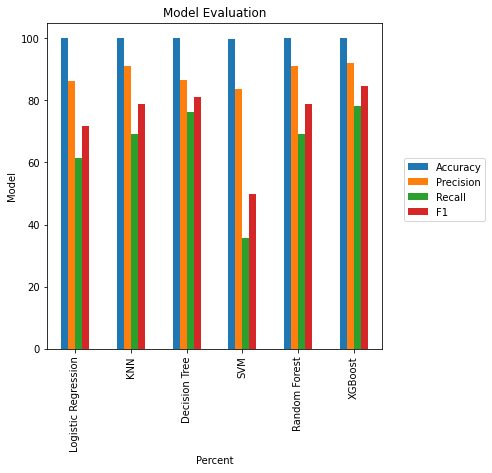

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=120)

df.plot(kind="bar")
plt.title("Model Evaluation")
plt.xlabel("Percent")
plt.ylabel("Model")
plt.legend(bbox_to_anchor=(1.05, 0.6))

#### Confusion Matrix

In [27]:
# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

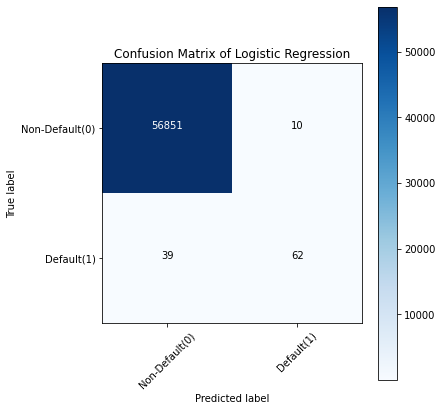

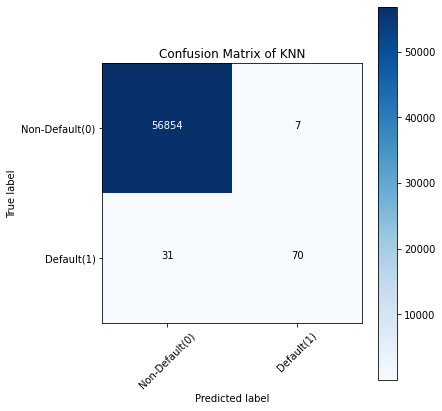

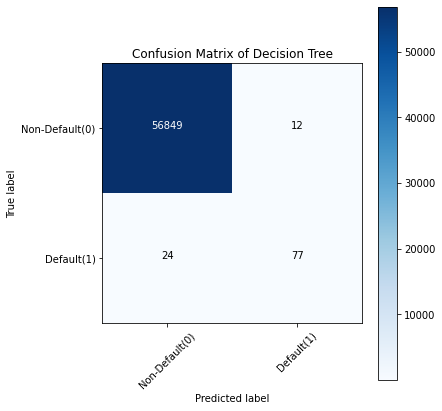

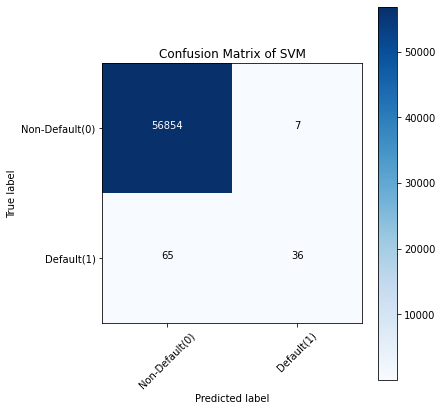

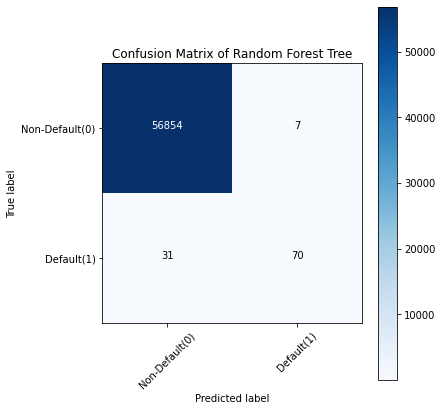

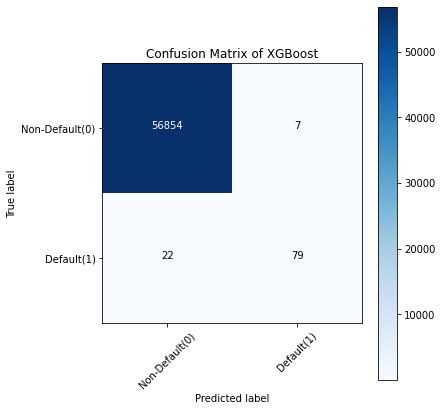

In [36]:
# Compute confusion matrix for the models

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])        # Logistic Regression
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])      # K-Nearest Neighbors
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])    # Decision Tree
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])      # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])        # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1])      # XGBoost



# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

########################
# 1. Logistic regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()


########################
# 2. K-Nearest Neighbors
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.show()


########################
# 3. Decision tree
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.show()


########################
# 4. Support Vector Machine
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.show()


########################
# 5. Random forest tree
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.show()


########################
# 6. XGBoost
xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.show()